In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas_profiling

from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier,StackingClassifier

from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

C:\Users\radia\AppData\Local\Temp\ipykernel_13056\2570642711.py:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [2]:
train=pd.read_csv('train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
test=pd.read_csv('test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
sample=pd.read_csv('gender_submission.csv')
sample

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [5]:
train.duplicated().sum()

0

In [6]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train[train['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [8]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [9]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
train['Embarked'].mode()[0]

'S'

In [11]:
train['Embarked']=train['Embarked'].mode()[0]

In [12]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [13]:
train.dropna(inplace=True)

In [14]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [15]:
train['source']='train'
test['source']='test'

In [16]:
data=pd.concat([train,test])
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,train
10,11,1.0,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,train
11,12,1.0,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,test
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,test
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,test
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,test


In [17]:
data.duplicated().sum()

0

In [18]:
data.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
source           0
dtype: int64

In [19]:
data['Survived'].value_counts()

1.0    125
0.0     60
Name: Survived, dtype: int64

In [20]:
data['Survived'].unique()

array([ 1.,  0., nan])

In [21]:
data['Survived'].mode()[0]

1.0

In [22]:
data['Survived'].fillna(data['Survived'].mode()[0])

1      1.0
3      1.0
6      0.0
10     1.0
11     1.0
      ... 
413    1.0
414    1.0
415    1.0
416    1.0
417    1.0
Name: Survived, Length: 603, dtype: float64

In [23]:
data['Survived']=data['Survived'].fillna(data['Survived'].mode()[0])

In [24]:
data['Survived'].isna().sum()

0

In [25]:
data['Survived'].astype('int')

1      1
3      1
6      0
10     1
11     1
      ..
413    1
414    1
415    1
416    1
417    1
Name: Survived, Length: 603, dtype: int32

In [26]:
data['Survived']=data['Survived'].astype('int')

In [27]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
source           0
dtype: int64

In [28]:
data[data['Fare'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source
152,1044,1,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,test


In [29]:
data['Cabin'].unique()

array(['C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'D33', 'B30', 'B28', 'C83', 'F33', 'F G73', 'E31', 'A5', 'D10 D12',
       'D26', 'C110', 'B58 B60', 'E101', 'D47', 'B86', 'F2', 'C2', 'B19',
       'A7', 'C49', 'F4', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78',
       'D35', 'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7',
       'B49', 'D', 'C22 C26', 'C65', 'E36', 'C54', 'B57 B59 B63 B66',
       'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'E33', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'C52', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'E12', 'E63', 'B37', 'C30', 'D20', 'B79',
       'E25', 'D46', 'B73', 'B38', 'B39', 'B22', 'C86', 'C70', 'A16',
       'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19', 'D50', 'D9',
       'A23', 'B50', 'A26', 'D48', 'E58', 'B71', 'B51 B53 B55', 'D49',
       'B5', 'B20', 'F G63', 'C62 C64', 'E24', 'C90', 'C126', 'C45', 'E8',
       'B101', 'C46', 'D30', 'E121', 'D11', 'E77', 'B3', '

In [30]:
data['Cabin'].value_counts()

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
B96 B98            4
F4                 4
                  ..
E63                1
E12                1
E38                1
C92                1
C105               1
Name: Cabin, Length: 176, dtype: int64

In [31]:
data['Cabin'].mode()[0]

'C23 C25 C27'

In [32]:
data['Cabin']=data['Cabin'].fillna(data['Cabin'].mode()[0])

In [33]:
data.isna().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Cabin           0
Embarked        0
source          0
dtype: int64

In [34]:
data[data['Fare'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source
152,1044,1,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,C23 C25 C27,S,test


In [35]:
data[data['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source
10,902,1,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,C23 C25 C27,S,test
22,914,1,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,C23 C25 C27,S,test
29,921,1,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,C23 C25 C27,C,test
33,925,1,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,C23 C25 C27,S,test
36,928,1,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,C23 C25 C27,S,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,1300,1,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,C23 C25 C27,Q,test
410,1302,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,C23 C25 C27,Q,test
413,1305,1,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,C23 C25 C27,S,test
416,1308,1,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,C23 C25 C27,S,test


In [36]:
imp=SimpleImputer()

In [37]:
impute=imp.fit_transform(data[['Age']])

In [38]:
data['Age']=impute

In [39]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
source         0
dtype: int64

In [40]:
imput=imp.fit_transform(data[['Fare']])

In [41]:
data['Fare']=imput

In [42]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
source         0
dtype: int64

In [43]:
data.duplicated().sum()

0

In [44]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,S,train
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,train
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,train
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.000000,1,1,PP 9549,16.7000,G6,S,train
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.000000,0,0,113783,26.5500,C103,S,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,1,3,"Spector, Mr. Woolf",male,32.260967,0,0,A.5. 3236,8.0500,C23 C25 C27,S,test
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,test
415,1307,1,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,C23 C25 C27,S,test
416,1308,1,3,"Ware, Mr. Frederick",male,32.260967,0,0,359309,8.0500,C23 C25 C27,S,test


In [45]:
data['Name'].unique()

array(['Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'McCarthy, Mr. Timothy J', 'Sandstrom, Miss. Marguerite Rut',
       'Bonnell, Miss. Elizabeth', 'Beesley, Mr. Lawrence',
       'Sloper, Mr. William Thompson', 'Fortune, Mr. Charles Alexander',
       'Harper, Mrs. Henry Sleeper (Myna Haxtun)',
       'Ostby, Mr. Engelhart Cornelius', 'Icard, Miss. Amelie',
       'Harris, Mr. Henry Birkhardt', 'Nye, Mrs. (Elizabeth Ramell)',
       'Moen, Mr. Sigurd Hansen', 'Fortune, Miss. Mabel Helen',
       'Chaffee, Mr. Herbert Fuller', 'Goldschmidt, Mr. George B',
       'Greenfield, Mr. William Bertram', 'White, Mr. Richard Frasar',
       'Porter, Mr. Walter Chamberlain', 'Baxter, Mr. Quigg Edmond',
       'Webber, Miss. Susan', 'White, Mr. Percival Wayland',
       'Newsom, Miss. Helen Monypeny', 'Futrelle, Mr. Jacques Heath',
       'Giglio, Mr. Victor', 'Navratil, Mr. Michel ("Louis M Hoffman")',
       'Pears, Mrs. T

In [46]:
data.corr()

C:\Users\radia\AppData\Local\Temp\ipykernel_13056\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.484348,0.459601,-0.144921,-0.018961,-0.031957,-0.253221
Survived,0.484348,1.000000,0.264340,-0.218333,0.033974,-0.012240,-0.076890
Pclass,0.459601,0.264340,1.000000,-0.403227,-0.016460,-0.001534,-0.544826
Age,-0.144921,-0.218333,-0.403227,1.000000,-0.100148,-0.102173,0.185053
SibSp,-0.018961,0.033974,-0.016460,-0.100148,1.000000,0.297476,0.189766
Parch,-0.031957,-0.012240,-0.001534,-0.102173,0.297476,1.000000,0.269185
Fare,-0.253221,-0.076890,-0.544826,0.185053,0.189766,0.269185,1.000000


C:\Users\radia\AppData\Local\Temp\ipykernel_13056\2578434383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

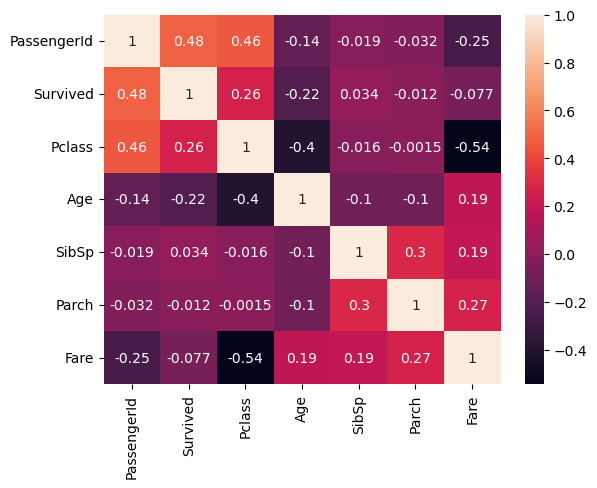

In [47]:
sns.heatmap(data.corr(),annot=True)

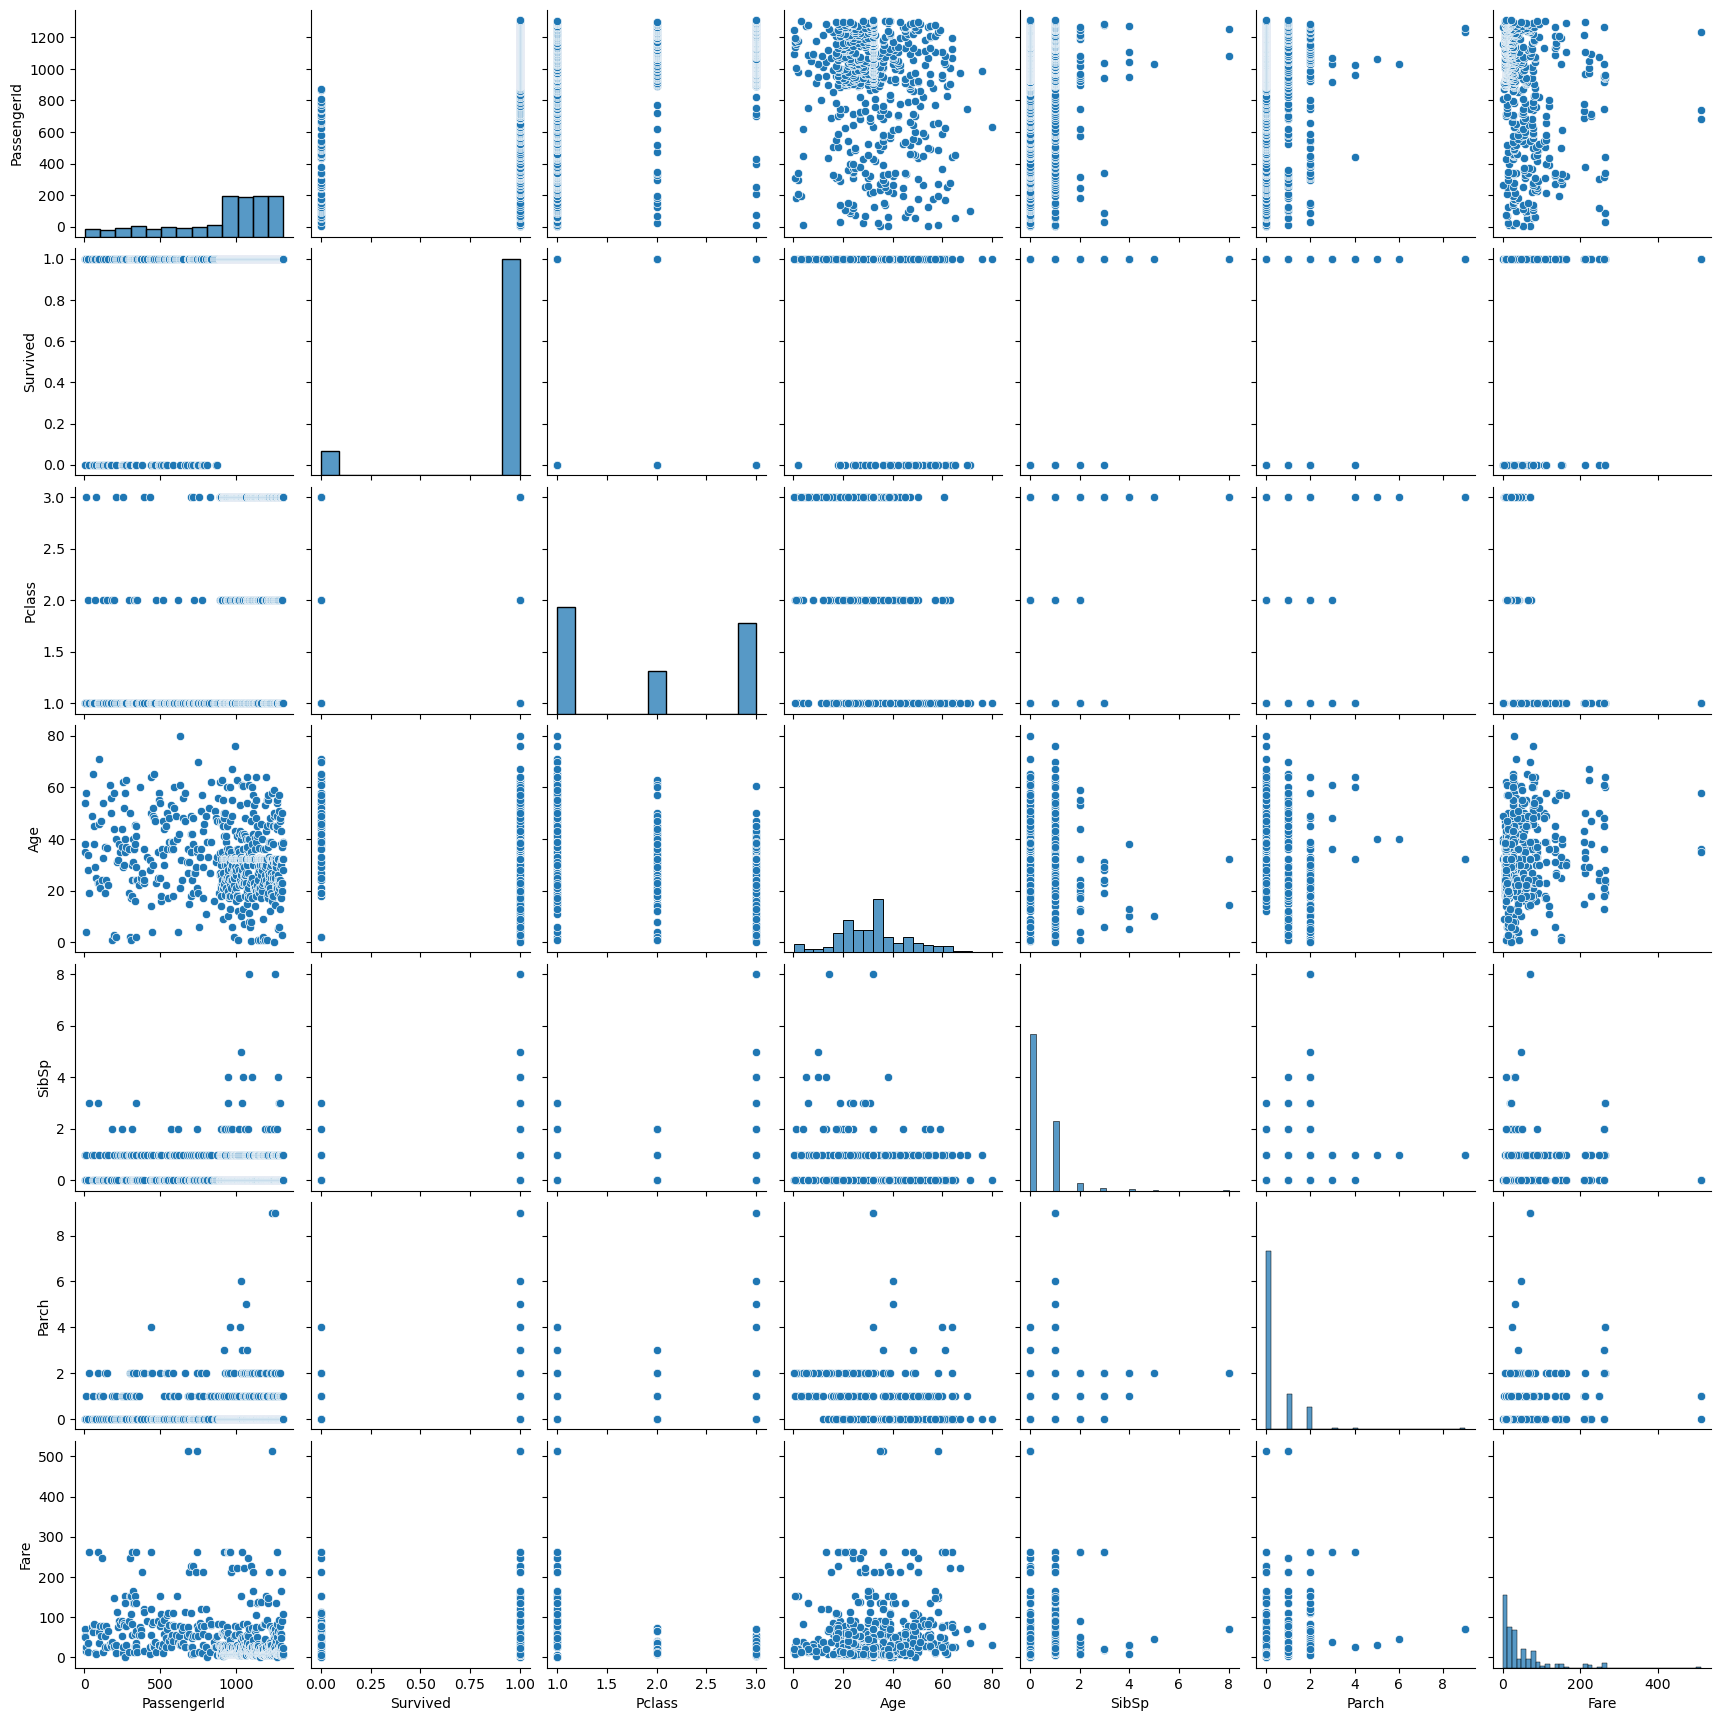

In [48]:
sns.pairplot(data)

In [49]:
data.select_dtypes(include=np.number)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
1,2,1,1,38.000000,1,0,71.2833
3,4,1,1,35.000000,1,0,53.1000
6,7,0,1,54.000000,0,0,51.8625
10,11,1,3,4.000000,1,1,16.7000
11,12,1,1,58.000000,0,0,26.5500
...,...,...,...,...,...,...,...
413,1305,1,3,32.260967,0,0,8.0500
414,1306,1,1,39.000000,0,0,108.9000
415,1307,1,3,38.500000,0,0,7.2500
416,1308,1,3,32.260967,0,0,8.0500


In [50]:
data.select_dtypes(exclude=np.number)

,Name,Sex,Ticket,Cabin,Embarked,source
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,S,train
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,train
6,"McCarthy, Mr. Timothy J",male,17463,E46,S,train
10,"Sandstrom, Miss. Marguerite Rut",female,PP 9549,G6,S,train
11,"Bonnell, Miss. Elizabeth",female,113783,C103,S,train
...,...,...,...,...,...,...
413,"Spector, Mr. Woolf",male,A.5. 3236,C23 C25 C27,S,test
414,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C,test
415,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,C23 C25 C27,S,test
416,"Ware, Mr. Frederick",male,359309,C23 C25 C27,S,test


In [51]:
data['PassengerId'].value_counts(normalize='True')

2       0.001658
1103    0.001658
1105    0.001658
1106    0.001658
1107    0.001658
          ...   
908     0.001658
909     0.001658
910     0.001658
911     0.001658
1309    0.001658
Name: PassengerId, Length: 603, dtype: float64

In [52]:
data['Survived'].value_counts(normalize='True')

1    0.900498
0    0.099502
Name: Survived, dtype: float64

In [53]:
sample = RandomOverSampler()

In [54]:
X,y = sample.fit_resample(data.drop(columns=['Survived','Name','Sex','Ticket',
                                            'Cabin','Embarked','source']),data['Survived'])

In [55]:
data_sample=pd.concat([X,y],axis=1)

In [56]:
data_sample

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
0,2,1,38.0,1,0,71.2833,1
1,4,1,35.0,1,0,53.1000,1
2,7,1,54.0,0,0,51.8625,0
3,11,3,4.0,1,1,16.7000,1
4,12,1,58.0,0,0,26.5500,1
...,...,...,...,...,...,...,...
1081,97,1,71.0,0,0,34.6542,0
1082,175,1,56.0,0,0,30.6958,0
1083,332,1,45.5,0,0,28.5000,0
1084,453,1,30.0,0,0,27.7500,0


In [57]:
scale=StandardScaler()

In [58]:
X_scale=pd.DataFrame(scale.fit_transform(X),columns=X.columns)

In [59]:
X_scale

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,-1.710894,-0.717229,0.116603,0.768096,-0.503489,0.230161
1,-1.705813,-0.717229,-0.080321,0.768096,-0.503489,-0.052019
2,-1.698191,-0.717229,1.166863,-0.575144,-0.503489,-0.071223
3,-1.688029,1.635974,-2.115198,0.768096,0.667365,-0.616898
4,-1.685488,-0.717229,1.429427,-0.575144,-0.503489,-0.464039
...,...,...,...,...,...,...
1081,-1.469539,-0.717229,2.282763,-0.575144,-0.503489,-0.338273
1082,-1.271374,-0.717229,1.298145,-0.575144,-0.503489,-0.399702
1083,-0.872502,-0.717229,0.608912,-0.575144,-0.503489,-0.433778
1084,-0.565092,-0.717229,-0.408527,-0.575144,-0.503489,-0.445417


In [60]:
data_sample_scale=pd.concat([X_scale,y],axis=1)

In [61]:
data_sample_scale

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
0,-1.710894,-0.717229,0.116603,0.768096,-0.503489,0.230161,1
1,-1.705813,-0.717229,-0.080321,0.768096,-0.503489,-0.052019,1
2,-1.698191,-0.717229,1.166863,-0.575144,-0.503489,-0.071223,0
3,-1.688029,1.635974,-2.115198,0.768096,0.667365,-0.616898,1
4,-1.685488,-0.717229,1.429427,-0.575144,-0.503489,-0.464039,1
...,...,...,...,...,...,...,...
1081,-1.469539,-0.717229,2.282763,-0.575144,-0.503489,-0.338273,0
1082,-1.271374,-0.717229,1.298145,-0.575144,-0.503489,-0.399702,0
1083,-0.872502,-0.717229,0.608912,-0.575144,-0.503489,-0.433778,0
1084,-0.565092,-0.717229,-0.408527,-0.575144,-0.503489,-0.445417,0


In [62]:
train_X, test_X, train_y,test_y=train_test_split(X,y,test_size=0.3,random_state=42)

In [63]:
model_ = {'Logistic': LogisticRegression(),
         'KNN': KNeighborsClassifier(),
         'Naive Bayes': GaussianNB(),
         'Decision Tree': DecisionTreeClassifier(),
         'RandomForest': RandomForestClassifier(),
         'AdaBoost': AdaBoostClassifier(),
         'GBM': GradientBoostingClassifier(),
         'Voting_hard': VotingClassifier(estimators=[('lr', LogisticRegression()), 
                                                ('rf', RandomForestClassifier()), 
                                                ('gmb', GradientBoostingClassifier())], 
                                    voting='hard'),
         'Voting_soft': VotingClassifier(estimators=[('lr', LogisticRegression()), 
                                                ('rf', RandomForestClassifier()), 
                                                ('gmb', GradientBoostingClassifier())], 
                                    voting='soft'),
         'Voting_soft_best_model': VotingClassifier(estimators=[('rf', RandomForestClassifier()), 
                                                ('gmb', GradientBoostingClassifier())], 
                                    voting='soft'),
         'Stacking': StackingClassifier(estimators=[('lr', LogisticRegression()), 
                                                ('rf', RandomForestClassifier()), 
                                                ('gmb', GradientBoostingClassifier())], 
                                     final_estimator=LogisticRegression()),
         'Stacking_best_model': StackingClassifier(estimators=[('rf', RandomForestClassifier()), 
                                                ('gmb', GradientBoostingClassifier())], 
                                     final_estimator=DecisionTreeClassifier()),
         'Stacking_best_model_best_final_estimator': StackingClassifier(estimators=[('rf', RandomForestClassifier()), 
                                                ('gmb', GradientBoostingClassifier())], 
                                     final_estimator=RandomForestClassifier()),   
          
        }

In [64]:
res = []
for name, model in model_.items():
    print("Model : ",name)
    model.fit(train_X,train_y)
    train_pred = model.predict(train_X)
    test_pred = model.predict(test_X)
    print("Train Accuracy : ",accuracy_score(train_y, train_pred))
    print("Test Accuracy : ",accuracy_score(test_y, test_pred))
    print("Train Confusion Matrix : ",confusion_matrix(train_y, train_pred))
    print("Test Confusion Matrix : ",confusion_matrix(test_y, test_pred))
    print("Train Classification Report : ",classification_report(train_y, train_pred))
    print("Test Classification Report : ",classification_report(test_y, test_pred))
    res.append([name,accuracy_score(train_y, train_pred), accuracy_score(test_y, test_pred)])

Model :  Logistic


C:\Users\radia\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Accuracy :  0.8381578947368421
Test Accuracy :  0.8650306748466258
Train Confusion Matrix :  [[335  57]
 [ 66 302]]
Test Confusion Matrix :  [[135  16]
 [ 28 147]]
Train Classification Report :                precision    recall  f1-score   support

           0       0.84      0.85      0.84       392
           1       0.84      0.82      0.83       368

    accuracy                           0.84       760
   macro avg       0.84      0.84      0.84       760
weighted avg       0.84      0.84      0.84       760

Test Classification Report :                precision    recall  f1-score   support

           0       0.83      0.89      0.86       151
           1       0.90      0.84      0.87       175

    accuracy                           0.87       326
   macro avg       0.87      0.87      0.86       326
weighted avg       0.87      0.87      0.87       326

Model :  KNN
Train Accuracy :  0.9368421052631579
Test Accuracy :  0.9171779141104295
Train Confusion Matrix :  [[3

C:\Users\radia\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Accuracy :  0.9815789473684211
Test Accuracy :  0.9478527607361963
Train Confusion Matrix :  [[392   0]
 [ 14 354]]
Test Confusion Matrix :  [[151   0]
 [ 17 158]]
Train Classification Report :                precision    recall  f1-score   support

           0       0.97      1.00      0.98       392
           1       1.00      0.96      0.98       368

    accuracy                           0.98       760
   macro avg       0.98      0.98      0.98       760
weighted avg       0.98      0.98      0.98       760

Test Classification Report :                precision    recall  f1-score   support

           0       0.90      1.00      0.95       151
           1       1.00      0.90      0.95       175

    accuracy                           0.95       326
   macro avg       0.95      0.95      0.95       326
weighted avg       0.95      0.95      0.95       326

Model :  Voting_soft


C:\Users\radia\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Accuracy :  0.9763157894736842
Test Accuracy :  0.9325153374233128
Train Confusion Matrix :  [[392   0]
 [ 18 350]]
Test Confusion Matrix :  [[151   0]
 [ 22 153]]
Train Classification Report :                precision    recall  f1-score   support

           0       0.96      1.00      0.98       392
           1       1.00      0.95      0.97       368

    accuracy                           0.98       760
   macro avg       0.98      0.98      0.98       760
weighted avg       0.98      0.98      0.98       760

Test Classification Report :                precision    recall  f1-score   support

           0       0.87      1.00      0.93       151
           1       1.00      0.87      0.93       175

    accuracy                           0.93       326
   macro avg       0.94      0.94      0.93       326
weighted avg       0.94      0.93      0.93       326

Model :  Voting_soft_best_model
Train Accuracy :  0.993421052631579
Test Accuracy :  0.9570552147239264
Train Confu

C:\Users\radia\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\radia\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Train Accuracy :  1.0
Test Accuracy :  0.9693251533742331
Train Confusion Matrix :  [[392   0]
 [  0 368]]
Test Confusion Matrix :  [[148   3]
 [  7 168]]
Train Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00       392
           1       1.00      1.00      1.00       368

    accuracy                           1.00       760
   macro avg       1.00      1.00      1.00       760
weighted avg       1.00      1.00      1.00       760

Test Classification Report :                precision    recall  f1-score   support

           0       0.95      0.98      0.97       151
           1       0.98      0.96      0.97       175

    accuracy                           0.97       326
   macro avg       0.97      0.97      0.97       326
weighted avg       0.97      0.97      0.97       326

Model :  Stacking_best_model
Train Accuracy :  0.9973684210526316
Test Accuracy :  0.9785276073619632
Train Confusion Matrix :  [[

In [65]:
res_ = pd.DataFrame(res, columns=['Model','Train Accuracy','Test Accuracy'])

In [66]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [67]:
train_X, test_X, train_y, test_y = train_test_split(X_poly,y, test_size=0.3,random_state=42)

In [68]:
res_poly = []
for name, model in model_.items():
    print("Model : ",name)
    model.fit(train_X,train_y)
    train_pred = model.predict(train_X)
    test_pred = model.predict(test_X)
    print("Train Accuracy : ",accuracy_score(train_y, train_pred))
    print("Test Accuracy : ",accuracy_score(test_y, test_pred))
    print("Train Confusion Matrix : ",confusion_matrix(train_y, train_pred))
    print("Test Confusion Matrix : ",confusion_matrix(test_y, test_pred))
    print("Train Classification Report : ",classification_report(train_y, train_pred))
    print("Test Classification Report : ",classification_report(test_y, test_pred))
    res_poly.append([name+'_polynomial_features',accuracy_score(train_y, train_pred), accuracy_score(test_y, test_pred)])
    



Model :  Logistic
Train Accuracy :  0.8302631578947368
Test Accuracy :  0.8312883435582822
Train Confusion Matrix :  [[329  63]
 [ 66 302]]
Test Confusion Matrix :  [[122  29]
 [ 26 149]]
Train Classification Report :                precision    recall  f1-score   support

           0       0.83      0.84      0.84       392
           1       0.83      0.82      0.82       368

    accuracy                           0.83       760
   macro avg       0.83      0.83      0.83       760
weighted avg       0.83      0.83      0.83       760



C:\Users\radia\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test Classification Report :                precision    recall  f1-score   support

           0       0.82      0.81      0.82       151
           1       0.84      0.85      0.84       175

    accuracy                           0.83       326
   macro avg       0.83      0.83      0.83       326
weighted avg       0.83      0.83      0.83       326

Model :  KNN
Train Accuracy :  0.9368421052631579
Test Accuracy :  0.9171779141104295
Train Confusion Matrix :  [[392   0]
 [ 48 320]]
Test Confusion Matrix :  [[151   0]
 [ 27 148]]
Train Classification Report :                precision    recall  f1-score   support

           0       0.89      1.00      0.94       392
           1       1.00      0.87      0.93       368

    accuracy                           0.94       760
   macro avg       0.95      0.93      0.94       760
weighted avg       0.94      0.94      0.94       760

Test Classification Report :                precision    recall  f1-score   support

           0     

C:\Users\radia\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Accuracy :  0.993421052631579
Test Accuracy :  0.9570552147239264
Train Confusion Matrix :  [[392   0]
 [  5 363]]
Test Confusion Matrix :  [[151   0]
 [ 14 161]]
Train Classification Report :                precision    recall  f1-score   support

           0       0.99      1.00      0.99       392
           1       1.00      0.99      0.99       368

    accuracy                           0.99       760
   macro avg       0.99      0.99      0.99       760
weighted avg       0.99      0.99      0.99       760

Test Classification Report :                precision    recall  f1-score   support

           0       0.92      1.00      0.96       151
           1       1.00      0.92      0.96       175

    accuracy                           0.96       326
   macro avg       0.96      0.96      0.96       326
weighted avg       0.96      0.96      0.96       326

Model :  Voting_soft


C:\Users\radia\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Accuracy :  0.9881578947368421
Test Accuracy :  0.950920245398773
Train Confusion Matrix :  [[392   0]
 [  9 359]]
Test Confusion Matrix :  [[151   0]
 [ 16 159]]
Train Classification Report :                precision    recall  f1-score   support

           0       0.98      1.00      0.99       392
           1       1.00      0.98      0.99       368

    accuracy                           0.99       760
   macro avg       0.99      0.99      0.99       760
weighted avg       0.99      0.99      0.99       760

Test Classification Report :                precision    recall  f1-score   support

           0       0.90      1.00      0.95       151
           1       1.00      0.91      0.95       175

    accuracy                           0.95       326
   macro avg       0.95      0.95      0.95       326
weighted avg       0.96      0.95      0.95       326

Model :  Voting_soft_best_model
Train Accuracy :  0.9973684210526316
Test Accuracy :  0.950920245398773
Train Confus

C:\Users\radia\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\radia\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Train Accuracy :  1.0
Test Accuracy :  0.9662576687116564
Train Confusion Matrix :  [[392   0]
 [  0 368]]
Test Confusion Matrix :  [[148   3]
 [  8 167]]
Train Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00       392
           1       1.00      1.00      1.00       368

    accuracy                           1.00       760
   macro avg       1.00      1.00      1.00       760
weighted avg       1.00      1.00      1.00       760

Test Classification Report :                precision    recall  f1-score   support

           0       0.95      0.98      0.96       151
           1       0.98      0.95      0.97       175

    accuracy                           0.97       326
   macro avg       0.97      0.97      0.97       326
weighted avg       0.97      0.97      0.97       326

Model :  Stacking_best_model
Train Accuracy :  0.9986842105263158
Test Accuracy :  0.9631901840490797
Train Confusion Matrix :  [[

In [69]:
poly_res = pd.DataFrame(res, columns=['Model','Train Accuracy','Test Accuracy'])

In [70]:
pd.concat([res_,poly_res])

,Model,Train Accuracy,Test Accuracy
0,Logistic,0.838158,0.865031
1,KNN,0.936842,0.917178
2,Naive Bayes,0.818421,0.858896
3,Decision Tree,1.000000,0.957055
4,RandomForest,1.000000,0.963190
5,AdaBoost,0.950000,0.926380
6,GBM,0.981579,0.944785
7,Voting_hard,0.981579,0.947853
8,Voting_soft,0.976316,0.932515
9,Voting_soft_best_model,0.993421,0.957055
